In [1]:
# The best time to release to release a movie

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
data = pd.read_csv("data/tn.movie_budgets.csv")
data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_month      5782 non-null   int32         
 7   total_revenue      5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(2)
memory usage: 338.9+ KB


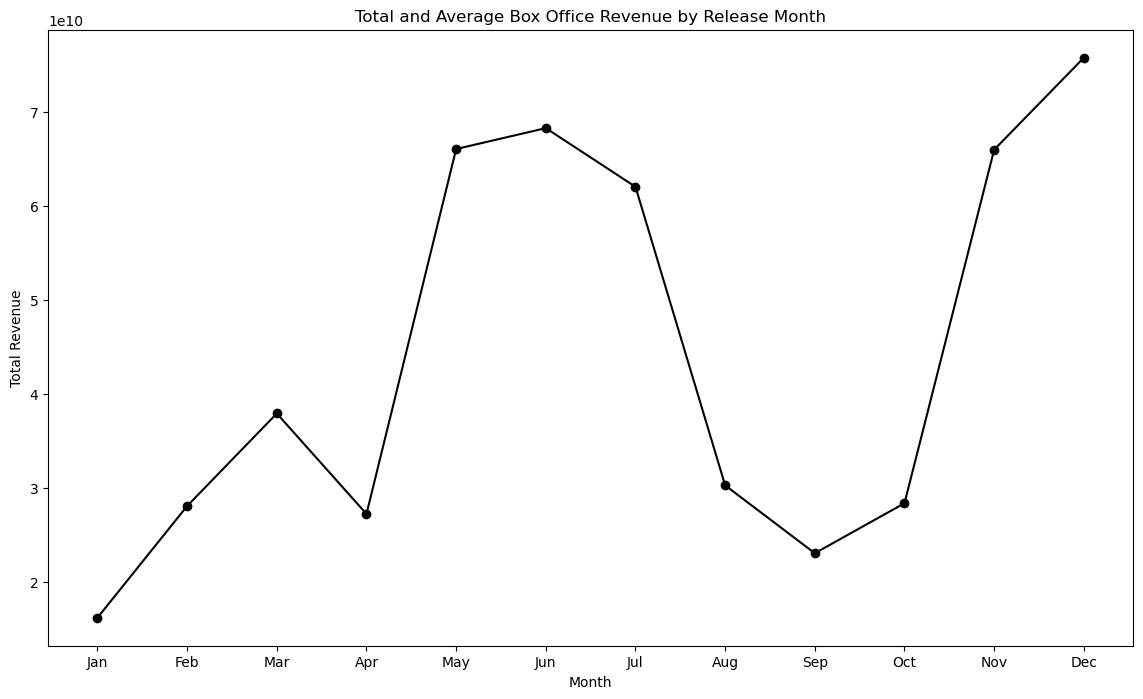

In [35]:

# Convert release_date to datetime
data['release_date'] = pd.to_datetime(data['release_date'])
data.info()
# Extract month and year from release date
data['release_month'] = data['release_date'].dt.month

# Convert gross revenues to numeric, stripping out the dollar signs and commas
data['domestic_gross'] = data['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
data['worldwide_gross'] = data['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate total revenue (domestic + international)
data['total_revenue'] = data['worldwide_gross']

# Group by month and calculate total and average revenue
monthly_revenue = data.groupby('release_month')['total_revenue'].agg(['sum', 'mean']).reset_index()

# Plot the total and average revenue by month
fig, ax1 = plt.subplots(figsize=(14, 8))


ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue', color="black")
ax1.plot(monthly_revenue['release_month'], monthly_revenue['sum'], color="black", marker='o', label='Total Revenue')
plt.title('Total and Average Box Office Revenue by Release Month')
plt.xticks(monthly_revenue['release_month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Explaining the trends of data

1. **January:**
   - **Observation:** Low revenue at the start of the year.

2. **February and March:**
   - **Observation:** Revenue increases significantly from February to March.
3. **April**
   - **Observation:** A noticeable dip in April followed by a rise in May.
4. **may**
   - a significant rise in revenue in May
5. **June and July:**
   - **Observation:** a noticeable dip from June to July.
5. **July and August:**
   - **Observation:** A significant dip in July to August.
5. **August and September:**
   - **Observation:** A dip in the revenue from August to September
7. **September and October:**
   - **Observation:** A noticeable rise from September to October
8. **November and December:**
   - **Observation:** A significant rise from the month of November to December

### Summary of Trends:

- **Peaks:**
-  May, June and December.
-  The best time to release a movie as shown by the insight is  May,June and December